# Task 3 - Neural Networks with Tensorflow / Keras

## Mineral Identification (Image Dataset) 💎

Mineral image Identification is important because it enables efficient and accurate identification and sorting of minerals, particularly valuable in mining operations and geological research. By automating the process of mineral identification using image analysis, it reduces manual labor, saves time and costs, and improves the overall efficiency of mineral processing.

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#### Load Dataset

Source of dataset: https://www.kaggle.com/datasets/asiedubrempong/minerals-identification-dataset?resource=download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/mineral dataset'
image_size = (28,28)
images = []
labels = []
class_names = sorted(os.listdir(data_dir))
label_map = {name: idx for idx, name in enumerate(class_names)}

In [ ]:
for class_name in class_names:
  folder_path = os.path.join(data_dir, class_name)
  if os.path.isdir(folder_path):
    for file in os.listdir(folder_path):
      if file.endswith(('.png','.jpg','.jpeg')):
        img_path = os.path.join(folder_path,file)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label_map[class_name])

#### Convert become numpy array

In [ ]:
X = np.array(images)
y = to_categorical(labels)

#### Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Class total: {len(class_names)}")
print(f"Train data shape: {X_train.shape}")

Class total: 7
Train data shape: (760, 28, 28, 3)


#### Neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 3)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │       301,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,895 (1.18 MB)

 Trainable params: 309,895 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

#### Traininng processing

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 1000,
    batch_size = 4,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1833 - loss: 2.2896 - val_accuracy: 0.3553 - val_loss: 1.6690
Epoch 2/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2415 - loss: 1.8099 - val_accuracy: 0.3684 - val_loss: 1.5775
Epoch 3/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2953 - loss: 1.7202 - val_accuracy: 0.3947 - val_loss: 1.5139
Epoch 4/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3349 - loss: 1.6253 - val_accuracy: 0.4474 - val_loss: 1.5336
Epoch 5/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3127 - loss: 1.5898 - val_accuracy: 0.4079 - val_loss: 1.3873
Epoch 6/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4222 - loss: 1.4256 - val_accuracy: 0.4342 - val_loss: 1.4654
Epoch 7/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3921 - loss: 1.4344 - val_accuracy: 0.4211 - val_loss: 1.3661
Epoch 8/1000
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4284 - loss: 1.4014 - 

#### Visualization of Predicted results

In [ ]:
import random

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print(f"Accuration in testing data: {acc_score:.4f}")

Accuration in testing data: 0.4764


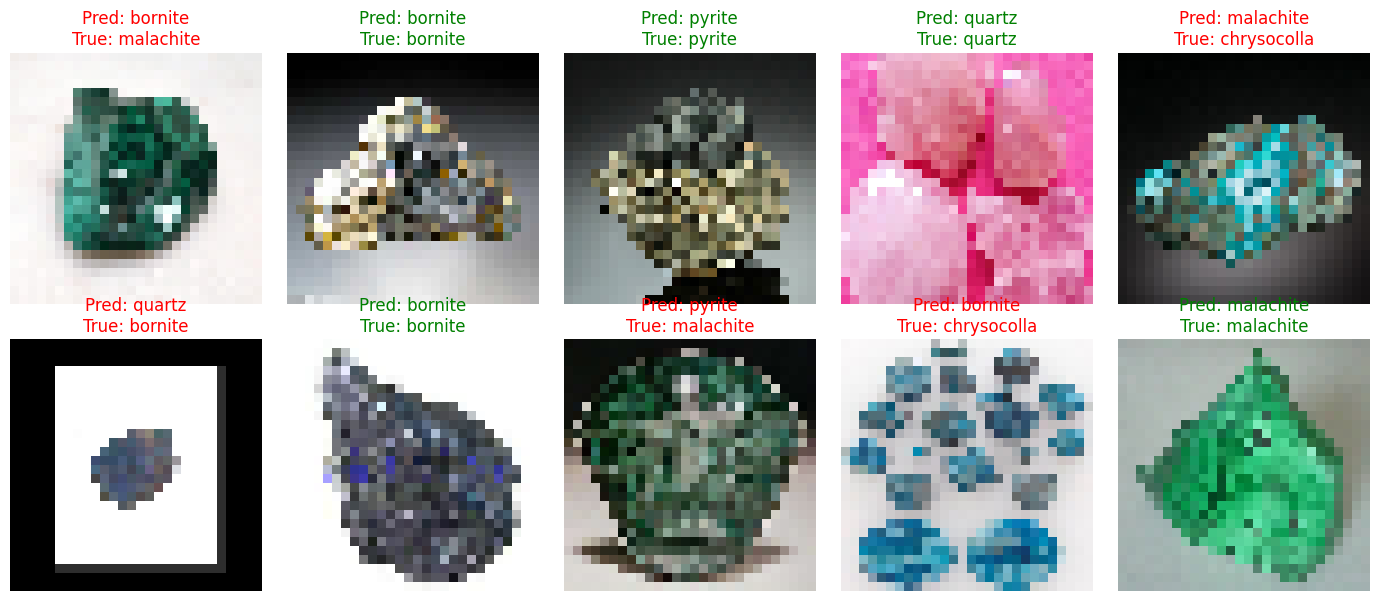

In [ ]:
plt.figure(figsize=(14,6))
for i in range(10):
  idx = random.randint(0, len(X_test)-1)
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[idx].squeeze(), cmap='gray')
  plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}",
            color='green' if y_pred[idx] == y_true[idx] else 'red')
  plt.axis('off')
plt.tight_layout()
plt.show()

#### Confusion Matrix

<Figure size 800x600 with 0 Axes>

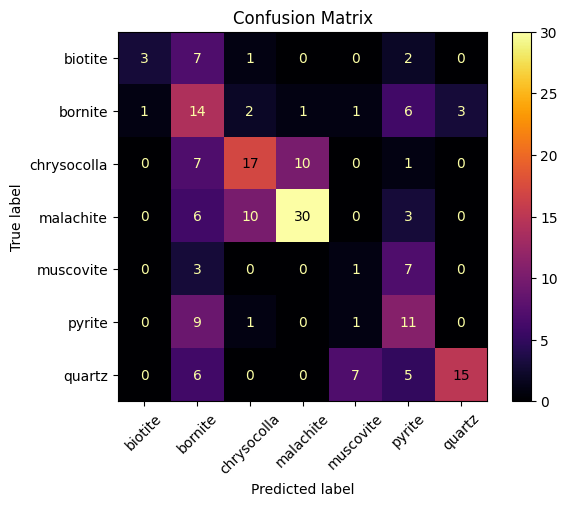

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(8, 6))
disp.plot(cmap='inferno', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#### Why the accuracy in testing data is litte bit low?

*   Imbalanced data

After checking, it turns out that there is an uneven distribution of the number of image data for each mineral. There are types of minerals that have a small number of image data, namely **biotite** and **muscovite** with less than 100 image data. This is quite far when compared to **malachite** whose data is more than 200 images.



<Axes: title={'center': 'Data Distribution of Each Class'}>

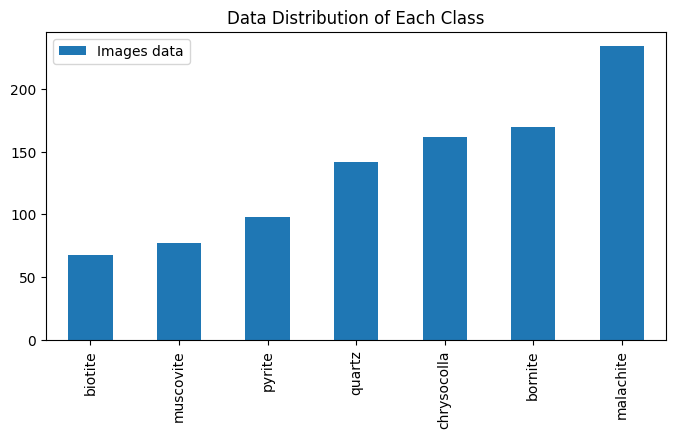

In [ ]:
from collections import Counter

label_counts = Counter(np.argmax(y, axis=1))
df_counts = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Images data'])
df_counts.index = [class_names[i] for i in df_counts.index]
df_counts.sort_values('Images data').plot(kind='bar', figsize=(8,4), title="Data Distribution of Each Class")

So to overcome this, other steps can be taken to optimize the results by using augmented data or hyperparameter tuning techniques.

#### Tuning hyperparameter

In [ ]:
def build_model(units=128, dropout_rate=0.3):
  model = Sequential([
      Flatten(input_shape=(28, 28, 3)),
      Dense(units, activation='relu'),
      Dropout(dropout_rate),
      Dense(units // 2, activation='relu'),
      Dense(len(class_names), activation='softmax')
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
for units in [64, 128, 256]:
  for drop in [0.2, 0.4]:
    print(f"\n Training model: units={units}, dropout={drop}")
    tuned_model = build_model(units, drop)
    tuned_model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.1, verbose=0)
    loss, acc = tuned_model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {acc:.4f}")